In [3]:
import pandas as pd

<font color=red>04-Chunk_with_Prompts.csv has all the prompts. Prompts related to specific chapter was called and sent to ChatGPT API to generate QA. It was asked to geneate 1118 questions from Chapter 1, 2, and 3. Different chunks and related prompts were used. Only 572 questions were unique</font>

In [1]:
# @title Load Configuraiton 
import hbqaconfig
conf = hbqaconfig.setEnv('local')
# for k,v in conf.items(): print (k,":",v)

In [5]:
df= pd.read_csv(conf['PE_FOLDER']+'04.1-Chunk_with_Prompts.csv')
print(df.shape)
df.head(5)

(1433, 7)


,Section_Id,Chunk_Id,Chunk_Letters,Chunk_Words,Chunk_Approx_Tokens,Prompt,ChatGPT_Response
0,Book01_002,4,2742,505,672.0,"Write 3 unique questions, corresponding answer...",NaN
1,Book01_003,8,5714,974,1295.0,"Write 6 unique questions, corresponding answer...",NaN
2,Book01_003,9,6353,974,1295.0,"Write 6 unique questions, corresponding answer...",NaN
3,Book01_003,15,2997,517,688.0,"Write 3 unique questions, corresponding answer...",NaN
4,Book01_004,16,5149,879,1169.0,"Write 6 unique questions, corresponding answer...",NaN


In [9]:
df.head(33)

,Section_Id,Chunk_Id,Chunk_Letters,Chunk_Words,Chunk_Approx_Tokens,Prompt
0,Book01_002,1,7511,1214,1615.0,"Write 4 unique questions, corresponding answer..."
1,Book01_002,2,7551,1261,1677.0,"Write 5 unique questions, corresponding answer..."
2,Book01_002,3,6986,1162,1545.0,"Write 4 unique questions, corresponding answer..."
3,Book01_002,5,10832,1949,2592.0,"Write 7 unique questions, corresponding answer..."
4,Book01_002,6,7755,1246,1657.0,"Write 4 unique questions, corresponding answer..."
5,Book01_003,8,5714,974,1295.0,"Write 3 unique questions, corresponding answer..."
6,Book01_003,9,6353,974,1295.0,"Write 3 unique questions, corresponding answer..."
7,Book01_003,10,7600,1259,1674.0,"Write 4 unique questions, corresponding answer..."
8,Book01_003,11,7759,1298,1726.0,"Write 5 unique questions, corresponding answer..."
9,Book01_003,12,7947,1336,1777.0,"Write 5 unique questions, corresponding answer..."


: 

In [96]:
import openai 

In [4]:
import openai
openai.api_key = secret_key
def get_qa(qa_prompt):
    try:
        response = openai.Completion.create(
            model="text-davinci-003",
            prompt=qa_prompt,
            max_tokens=1000,
            temperature=0,
            frequency_penalty=1
        )
        return response['choices'][0]['text']
    except:
        print("Error")
        return ""

In [5]:
start=400
end=450

for row in range(end-start):
    qa_prompt = df.loc[row,'Prompt']
    response = get_qa(qa_prompt)
    df.loc[row+start,"QA"] = response 
    print("Row: ", row+start)

#response = df['Prompt'].apply(get_qa)

C:\Users\hari_\AppData\Local\Temp\ipykernel_19760\2192288036.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '
Question 1: What is the name of the great sage who composed the Mahabharata?
Answer: The great sage who composed the Mahabharata is Krishna-Dwaipayana, also known as Vyasa. 

Question 2: Who recited the Mahabharata at Janamejaya's Snake-sacrifice?
Answer: The Mahabharata was recited at Janamejaya's Snake-sacrifice by Vaisampayana under the direction of Dwaipayana. 

Question 3: How many generations were produced from Div? 
Answer: From Div were produced thirty-three thousand, thirty-three hundred and thirty-three generations. 

Question 4: What are some of the topics discussed in Vyasa's book? 
Answer: Some of the topics discussed in Vyasa's book include precepts of religious duty and worldly profit, acts of illustrious saints and sovereigns, Vedas, Yoga, Dharma, Artha and Kama, rules for conduct of man

Row:  400
Row:  401
Row:  402
Row:  403
Row:  404
Row:  405
Row:  406
Row:  407
Row:  408
Row:  409
Row:  410
Row:  411
Row:  412
Row:  413
Row:  414
Row:  415
Row:  416
Row:  417
Row:  418
Row:  419
Row:  420
Row:  421
Row:  422
Row:  423
Row:  424
Row:  425
Row:  426
Row:  427
Row:  428
Row:  429
Row:  430
Row:  431
Row:  432
Row:  433
Row:  434
Row:  435
Row:  436
Row:  437
Row:  438
Row:  439
Row:  440
Row:  441
Row:  442
Row:  443
Row:  444
Row:  445
Row:  446
Row:  447
Row:  448
Row:  449


In [6]:
df=df.loc[df['QA'].notna(),:]

In [7]:
qa_file="21-QA_Chunk"+str(start)+"_"+str(end-1)+".csv"

In [8]:
df.to_csv(conf['QAGS_FOLDER']+qa_file)

In [9]:
df

,Section_Id,Chunk_Id,Chunk_Letters,Chunk_Words,Chunk_Approx_Tokens,Prompt,QA
400,Book03_171,401,4655,786,1045.0,"Write 3 unique questions, corresponding answer...",\nQuestion 1: What is the name of the great sa...
401,Book03_172,402,8474,1451,1930.0,"Write 5 unique questions, corresponding answer...",\nQ1: Who was the author of the Bharata?\nA1: ...
402,Book03_175,403,4606,770,1024.0,"Write 3 unique questions, corresponding answer...",Q: What did Dhritarashtra do when he heard the...
403,Book03_176,404,4899,788,1048.0,"Write 3 unique questions, corresponding answer...",\nQ1: Who followed Yudhishthira into the wilde...
404,Book03_177,405,4712,785,1044.0,"Write 3 unique questions, corresponding answer...",Question 1: What did Dhritarashtra wish to do ...
405,Book03_178,406,7423,1282,1705.0,"Write 5 unique questions, corresponding answer...",\nQuestions:\n1. What did Rama ask for as a bo...
406,Book03_179,407,5948,1049,1395.0,"Write 4 unique questions, corresponding answer...",\nQ1: What is the first parva of the Bharata h...
407,Book03_180,408,7750,1308,1740.0,"Write 5 unique questions, corresponding answer...",\nQ1: What is the Adi Parva about?\nA1: The Ad...
408,Book03_182,409,8097,1422,1891.0,"Write 5 unique questions, corresponding answer...",\nQ1: What is the third parva of the Mahabhara...
409,Book03_182,410,3458,613,815.0,"Write 2 unique questions, corresponding answer...",\nQuestion 1: What is the name of the fifth Pa...


# Load Final QA file. 
It was cleaned in googlesheet.

In [6]:
df = pd.read_excel(conf['QAGS_FOLDER']+'06.10-QA_Final_ChatGPT_API.xlsx',sheet_name='UniqueQues')

In [7]:
df

,Sno,Ques,Same Ques,Same Ans,Same Ques & Diff Ans,Ans
0,1949,How did Agni respond to the Rakshasa's question?,0,0,False,Agni responded that Puloma had been duly made ...
1,2482,How did Arjuna become respected among bowmen?,0,0,False,After having studied whole Vedas and sundry ot...
2,3009,How did Arjuna gain Subhadra for a wife?,0,0,False,Arjuna gained Subhadra for a wife when he went...
3,2289,How did Aruni of Panchala stop up the breach i...,0,0,False,Aruni of Panchala stopped up the breach by lyi...
4,2821,How did Astika compare Janamejaya's sacrifice ...,0,0,False,Astika compared Janamejaya's sacrifice to thos...
...,...,...,...,...,...,...
566,2027,Who witnessed the conversation between Takshak...,0,0,False,Brahmana's menial witnessed the conversation b...
567,2560,Why did Agni become distressed when asked abou...,0,0,False,Agni became distressed because he was afraid o...
568,3087,Why did Kasyapa approach Takshaka on the way?,0,0,False,Kasyapa approached Takshaka on the way because...
569,1644,Why did Krisa speak to Sringin in a playful mood?,0,0,False,Krisa spoke to Sringin in a playful mood becau...


In [27]:
df['WordsInQues'] = df.Ques.str.split(' ').apply(len)
df['WordsInAns'] = df['Ans'].str.split(' ').apply(len)

In [28]:
df

,Sno,Ques,Same Ques,Same Ans,Same Ques & Diff Ans,Ans,WordsInAns,WordsInQues
0,1949,How did Agni respond to the Rakshasa's question?,0,0,False,Agni responded that Puloma had been duly made ...,30,8
1,2482,How did Arjuna become respected among bowmen?,0,0,False,After having studied whole Vedas and sundry ot...,39,7
2,3009,How did Arjuna gain Subhadra for a wife?,0,0,False,Arjuna gained Subhadra for a wife when he went...,22,8
3,2289,How did Aruni of Panchala stop up the breach i...,0,0,False,Aruni of Panchala stopped up the breach by lyi...,13,12
4,2821,How did Astika compare Janamejaya's sacrifice ...,0,0,False,Astika compared Janamejaya's sacrifice to thos...,28,11
...,...,...,...,...,...,...,...,...
566,2027,Who witnessed the conversation between Takshak...,0,0,False,Brahmana's menial witnessed the conversation b...,12,11
567,2560,Why did Agni become distressed when asked abou...,0,0,False,Agni became distressed because he was afraid o...,41,9
568,3087,Why did Kasyapa approach Takshaka on the way?,0,0,False,Kasyapa approached Takshaka on the way because...,25,8
569,1644,Why did Krisa speak to Sringin in a playful mood?,0,0,False,Krisa spoke to Sringin in a playful mood becau...,31,10


In [30]:
df.describe([.25,.50,.75,.90,.95,.99])

,Sno,Same Ques,Same Ans,WordsInAns,WordsInQues
count,571.000000,571.0,571.000000,571.000000,571.000000
mean,1750.161121,0.0,0.008757,22.656743,10.112084
std,932.232466,0.0,0.093248,27.321694,3.293488
min,1.000000,0.0,0.000000,1.000000,3.000000
25%,995.500000,0.0,0.000000,12.000000,8.000000
50%,1756.000000,0.0,0.000000,19.000000,10.000000
75%,2561.500000,0.0,0.000000,27.000000,12.000000
90%,3042.000000,0.0,0.000000,37.000000,14.000000
95%,3179.500000,0.0,0.000000,47.000000,16.000000
99%,3279.700000,0.0,0.000000,73.300000,19.300000


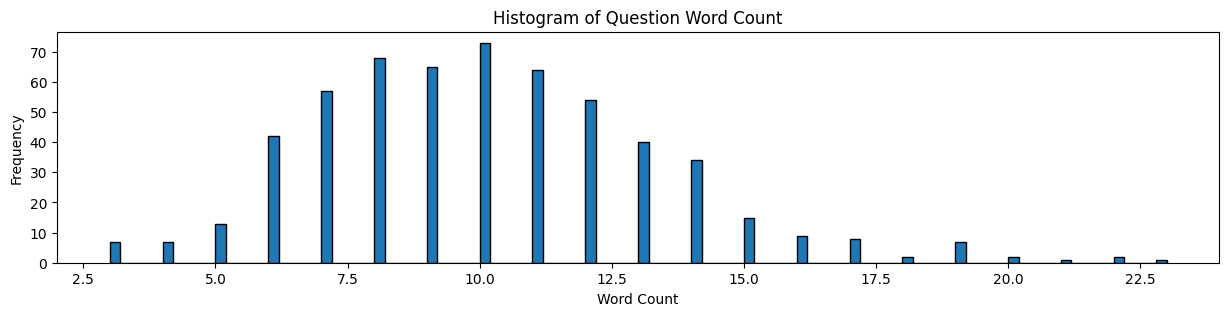

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,3))
plt.hist(df['WordsInQues'], bins=100, edgecolor='k') 
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Histogram of Question Word Count')
plt.show()

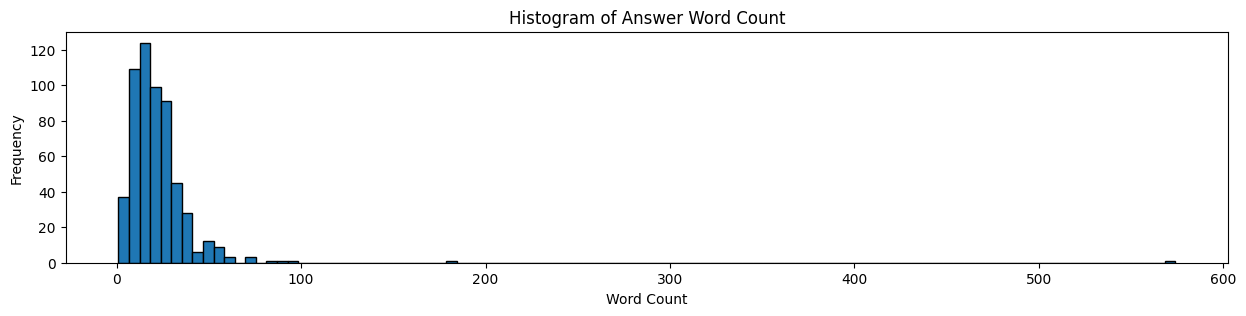

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,3))
plt.hist(df['WordsInAns'], bins=100, edgecolor='k') 
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Histogram of Answer Word Count')
plt.show()